In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import statistics

In [226]:
# creates test dataset
rng = np.random.default_rng()
test_data = rng.normal(loc=10, scale=7, size=10000)

In [199]:
def bootstrap(data, sample_size=10, num_of_samples=10000):
    bootstrapped_means = np.array([])

    for i in range(num_of_samples):
        bootstrapped_sample = np.random.choice(data, size=sample_size, replace=True)
        mean = bootstrapped_sample.mean()
        bootstrapped_means = np.append(bootstrapped_means, mean)
    
    return bootstrapped_means

In [290]:
def MakeLessThan(prob=0.05, bootstrapped_means=bootstrapped_means):
    
    standard_deviation = np.std(bootstrapped_means)
    mean_of_means = np.mean(bootstrapped_means)
    
    calc_z = st.norm.ppf(prob)
    
    make_less_than = calc_z * standard_deviation + mean_of_means
    
    return make_less_than

In [291]:
def ProbOfLessThan(percent_return=5, bootstrapped_means=bootstrapped_means): 
    
    standard_deviation = np.std(bootstrapped_means)
    mean_of_means = np.mean(bootstrapped_means)
    
    z = statistics.NormalDist(mean_of_means, standard_deviation).zscore(percent_return) 
    
    prob_of_less_than = st.norm.cdf(z)
    
    return prob_of_less_than

In [299]:
def NumOfStocks(data, percent_return=1, prob_percent_return=0.05, pool_num=500):
    
    for i in range(1, pool_num+1):
        
        bootstrapped_means = bootstrap(data=data, sample_size=i)

        prob = ProbOfLessThan(bootstrapped_means=bootstrapped_means, percent_return=percent_return)
        
        if prob <= prob_percent_return: 
            return i, prob

In [293]:
bootstrapped_means = bootstrap(test_data)

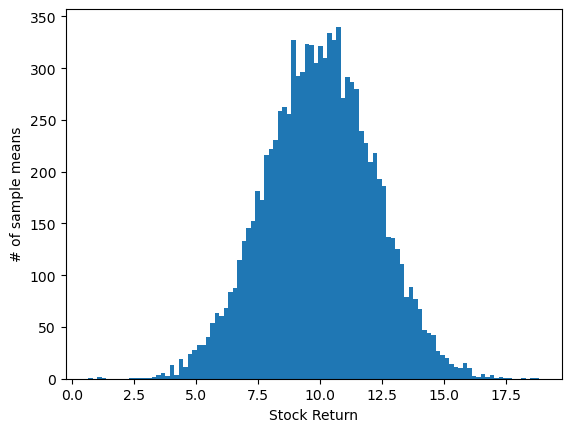

In [228]:
plt.hist(bootstrapped_means, bins=100)
plt.xlabel('Stock Return')
plt.ylabel('# of sample means')
plt.show()